# Zero-bias current
A quick examination of the current through the molecular junction when $\Delta\mu = 0$ eV.

## **Step 0:** Import relevant packages and load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from param_parser import ParameterParser
import plt_utils

# plt_utils.setup_tex()
# rcParams['image.aspect'] = 'auto'

plt.rcParams.update({'image.aspect': 'auto'})

print(rcParams['font.sans-serif'])

# Need to do this on Jupyter Notebook (ugh)
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['CMU Bright', 'DejaVu Sans Display']

kB = 8.617e-5
npydir = 'MAC_aligned_focused_smaller_dmu_no_shift'
param_file = 'aligned_focused_smaller_dmu.json'

pp = ParameterParser(param_file)

kappa_grid, w0_grid, muL_grid, temp_grid, e_grid = \
pp.load_grids(plist=['kappa_grid', 'frequency_grid','muL_grid',\
    'temperature_grid', 'energy_grid'])

dmu_grid = muL_grid * 2

I = np.moveaxis(np.load('%s/current_dis.npy'%npydir),2,-1) #move dmu axis to last position to use tensor_linregress painlessly
# axes of I are now: (w0, kappa, beta, dmu)

I_zero_bias = I[:,:,:,0] #I(dmu = 0)
I_finite_bias = I[:,:,:,1:] #I(dmu > 0)

print('Mean zero-bias current = ', np.mean(I_zero_bias))
print('Mean finite-bias current = ', np.mean(I_finite_bias))


['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
Mean zero-bias current =  -2.5665128156316494e-05
Mean finite-bias current =  0.007121015717424475


As we can see the mean zero-bias current isn't 0 and is two orders of magnitude smaller than the finite bias voltage. This seems a bit fishy. Let's investigate further.

## **Step 1:** Current heatmaps for different $(\omega_0,\,\kappa,\,T)$ conditions
Just to get a quick visual sense of what conditions lead to the highest zero-bias currents.


['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']


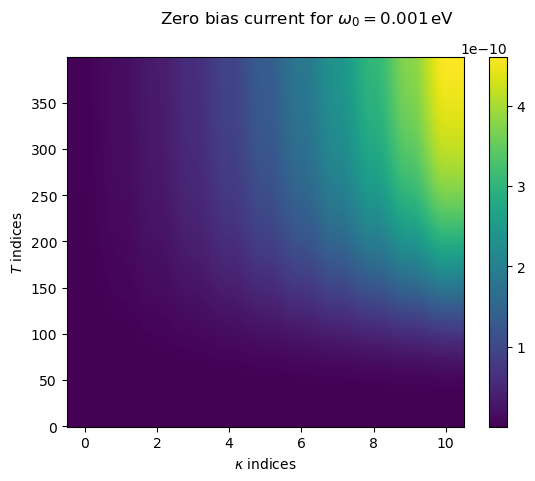

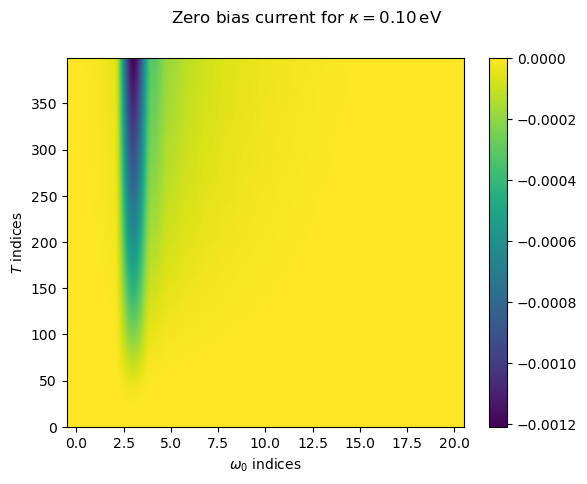

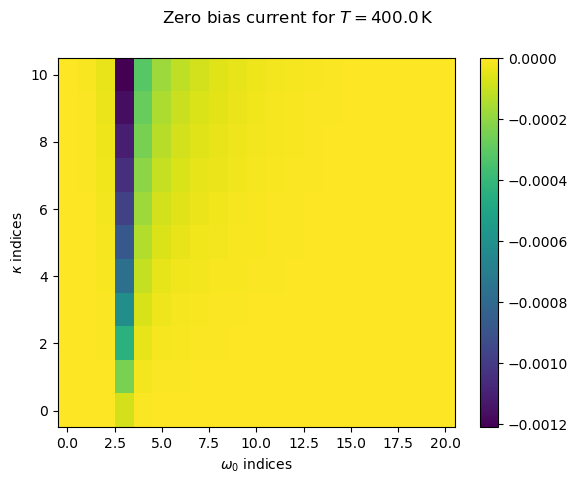

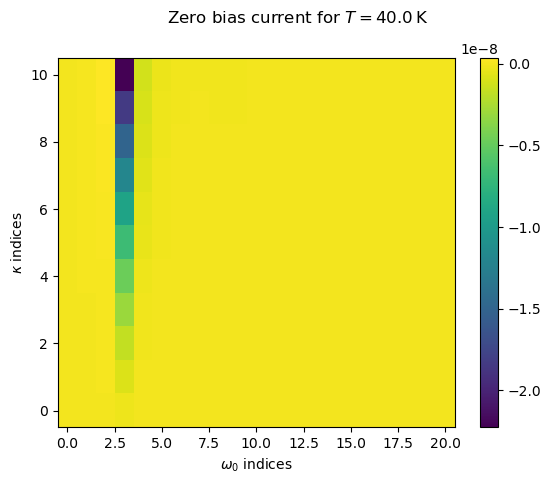

Argmax of zero-bias current:  (2, 10, 32)
Corresponds to:
     omega_0 = 0.0109 eV
     kappa = 0.1000 eV
     T = 68.87218045112782 K


In [3]:
print(rcParams['font.sans-serif'])

plt.imshow(I_zero_bias[0].T,origin='lower')
plt.suptitle('Zero bias current for $\omega_0 = %5.3f\,$eV'%w0_grid[0])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,-1,:].T,origin='lower')
plt.suptitle('Zero bias current for $\kappa = %4.2f\,$eV'%kappa_grid[-1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,-1].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[0])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

fishy_inds  = np.unravel_index(np.argmax(I_zero_bias),I_zero_bias.shape)
print('Argmax of zero-bias current: ', fishy_inds)
print(f'Corresponds to:\n \
    omega_0 = {w0_grid[fishy_inds[0]]:6.4f} eV\n \
    kappa = {kappa_grid[fishy_inds[1]]:6.4f} eV\n \
    T = {temp_grid[fishy_inds[2]]} K')

Now we fix each condition to the argmax of the zero-bias current $\{\tilde{\omega}_0,\,\tilde{\kappa},\,\tilde{T}\}$ and plot the $I(\Delta\mu = 0)$ heatmap along the other two axes.
Again, this is just to get a visual sense of how the zero-bias current varies with $(\omega_0,\,\kappa,\,T)$.

It's weird that the max zero-bias current occurs at $\tilde{T} = 68$ K... would expect to this at a much higher temperature. Should investigate this later. For now, we'll just plot the current heatmap at $\tilde{T}$ and the max temperature of our scan (i.e. 400K)...

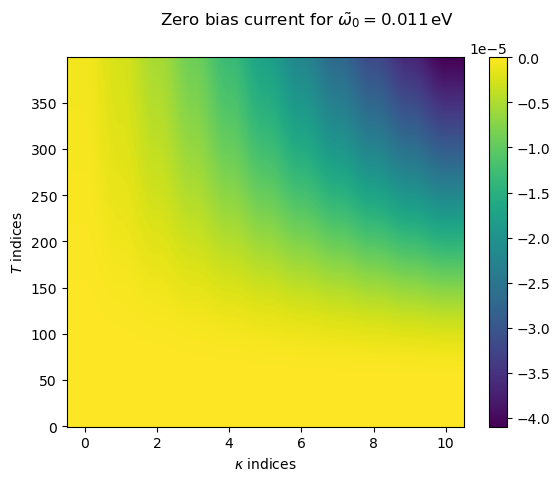

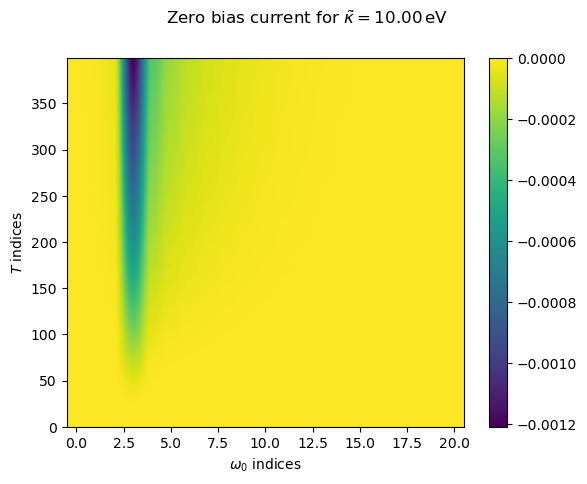

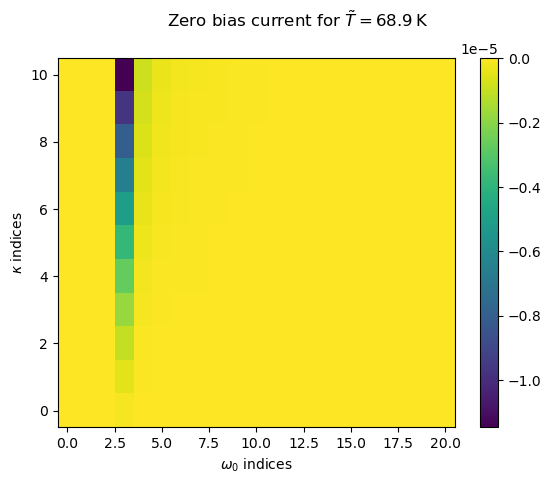

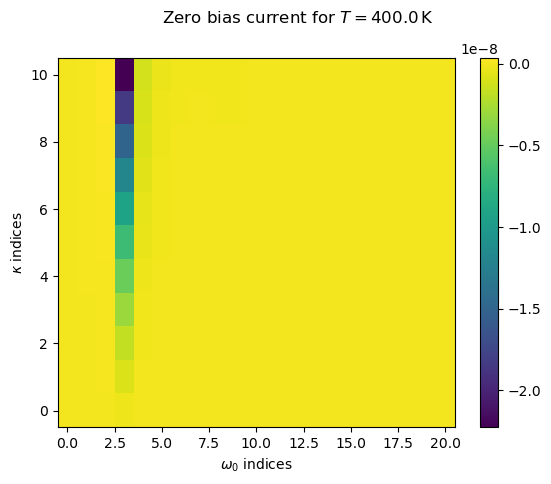

In [4]:
plt.imshow(I_zero_bias[fishy_inds[0]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\omega}_0 = %5.3f\,$eV'%w0_grid[fishy_inds[0]])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,fishy_inds[1],:].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\kappa} = %4.2f\,$eV'%fishy_inds[1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,fishy_inds[2]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{T} = %5.1f\,$K'%temp_grid[fishy_inds[2]])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

## **Step 2:** Plot the current distributions, both at $\Delta\mu = 0$ eV and for $\Delta\mu > 0$ eV.

0.7516341991341992


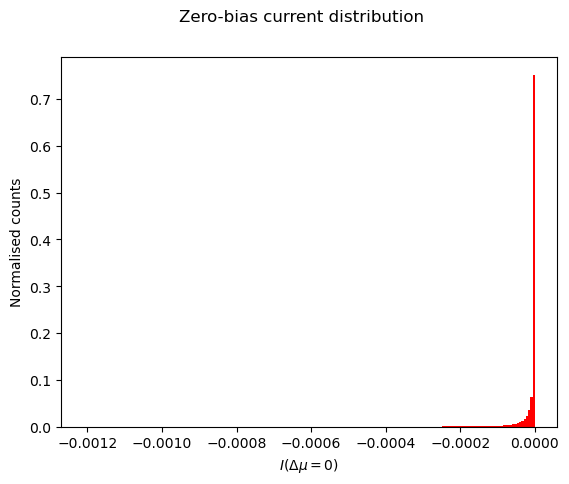

0.6266994434137291
0.9552705627705628


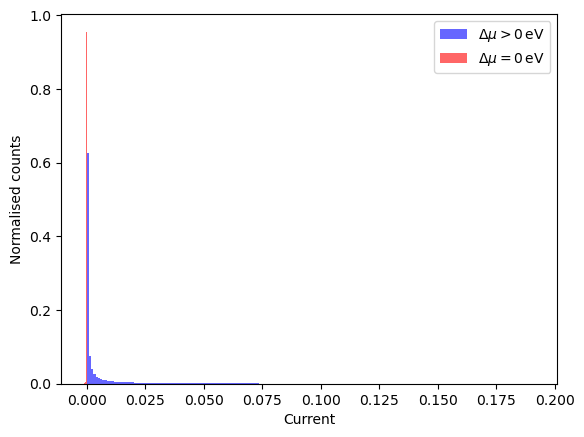

In [5]:
#Histogram of zero-bias current
plt_utils.histogram(I_zero_bias, nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True)
plt.suptitle('Zero-bias current distribution')
plt.show()

#Histogram of all current, with dmu = 0 and dmu > 0 plotted separately
plt_utils.histogram(I_finite_bias,nbins=200,xlabel='Current',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\mu > 0\,$eV'})
plt_utils.histogram(I_zero_bias,nbins=10,xlabel='Current',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\mu = 0\,$eV'})
plt.legend()
plt.show()

## **Step 3:**

We now examine the temperature dependence of zero-bias current.

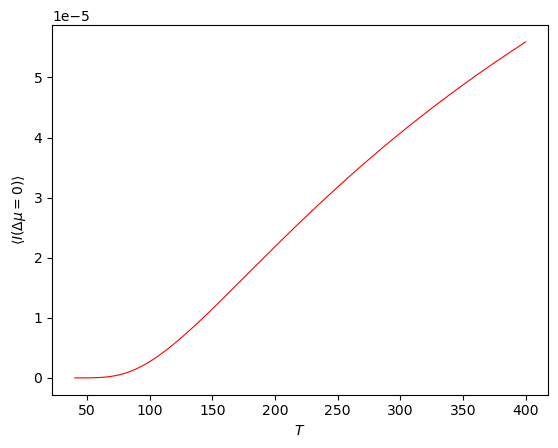

In [10]:
avg = np.mean(np.abs(I_zero_bias),axis=(0,1))
std = np.std(np.abs(I_zero_bias),axis=(0,1))
plt.plot(temp_grid,avg,'r-',lw=0.8)
#plt.plot(temp_grid,avg+std,'r--',lw=0.8)
#plt.plot(temp_grid,avg-std,'r--',lw=0.8)
plt.xlabel('$T$')
plt.ylabel('$\langle I(\Delta\mu = 0)\\rangle$')
plt.show()